# Introduction to the Finite Element Method with Python
### Bannhat Phat, Robin McDonald, Sophie Howell

### Introduction

The finite element method (FEA/FEM) is a useful numerical method for solving differential equations by subdividing a larger problem into smaller, "finite elements" through the process of discretization. This is achieved by creating a mesh of an object with a finite number of points. A system of equations for each finite element can then be assembled to solve for the entire problem.
FEM is very common in engineering fields, especially for fields such as structural analysis, heat flow, and fluid dynamics. 

FEM is based off of the weak formulation of a differential equation. It can also be easily applied to 1D, 2D, and 3D problems. 

### 1D Problem Walkthrough 

Consider the following 1D two-point boundary value problem with the following boundary conditions.

\begin{equation}
\begin{array}{cccc}
-u''(x) = f(x), &  0 < x < 1 , & u(0) = 0 , & u(1) = 0
\end{array}
\end{equation}

#### Step 1
The first step in the Galerkin FE method is to construct the weak formulation of this equation.
This can be done by multiplying both sides by a test function $v(x)$ that satisfies the following boundary conditions $v(0) = 0$, $v(1) = 0$, such that 

\begin{equation}
-u''v = fv
\end{equation}

This can then be integrated by parts to obtain the following:

\begin{equation}
\int_{0}^{1} u'v'dx = \int_{0}^{1} fvdx
\end{equation}

This is our weak formulation, and we will be coming back to this formula soon.

Note: There is another form of the PDE you can decide to take when using FEM. Using the minimization form when using FEM is called the "Ritz Method." In our case, since we are using the variational/weak form of the PDE with FEM, our method is also known as the "Galerkin method." The weak form is the mostly widely used, although depending on certain assumptions or conditions the original, weak, and minimization forms are identical. 

#### Step 2
The next step is to generate the mesh. This will be a set of coordinates with even spacing. This is essentially the step where you create your finite elements.


For a general example, we can choose $x_i = ih$ where $ i = 0,1,2...n$ and where $ h = 1/n$.
This will define the interval ($x_{i-1}, x_i$) with $i = 1,2...n-1$.

$x_i$ is called a node, and $(x_i,x_{i+1})$, (or ($x_{i-1},x_i$) in our specific case) is called an element.

#### Step 3
The next step is to define a set of basis functions based on the mesh we have just defined.
In our case, we can choose this linear piecewise function. This will end up having a triangle-like shape.

\begin{equation}
   \phi_i(x) = \left\{
\begin{array}{ll}
      \frac{x-x_{i-1}}{h} & x_{i-1} \leq x < x_i, \\
      \frac{x_{i+1}-x}{h} & x_i \leq x < x_{i+1}, \\
      0 & \textrm{otherwise} \\
\end{array} 
\right. 
\end{equation}

This function in particular is called a hat function. General advice for chosing basis functions is to make them as simple as possible. Ideally, it should be zero everywhere outside of a small region, and should be continuous and differentiable except at the nodes.

#### Step 4
We can then represent the approximate finite element solution as a linear combination of all of the basis functions:

\begin{equation}
u_h(x) = \sum_{j=1}^{n-1} c_j\phi_j(x)
\end{equation}

The coefficients are unknown, and they can be determined by deriving a linear system of equations by substituting this approximate solution $u_h(x)$ for the exact solution $u(x)$ in the weak form integral introduced above such that

\begin{equation}
\sum_{j=1}^{n-1} c_j \int_{0}^{1} \phi_j'v'dx = \int_{0}^{1} fvdx
\end{equation}

We can then choose a test function $v(x)$ to be $\phi_1, \phi_2 \cdots \phi_{n-1}$ to get the following system of equations that we can write in matrix form:

\begin{gather}
\begin{bmatrix}
a(\phi_1,\phi_1) & a(\phi_1,\phi_2) & \cdots & a(\phi_1,\phi_{n-1}\\
a(\phi_2,\phi_1) & a(\phi_2,\phi_2) & \cdots & a(\phi_2,\phi_{n-1})\\
\vdots & \vdots & \vdots & \vdots \\
a(\phi_{n-1},\phi_1) & a(\phi_{n-1},\phi_2) & \cdots & a(\phi_{n-1},\phi_{n-1})\\
\end{bmatrix}
\begin{bmatrix}
c_1\\
c_2\\
\vdots\\
c_{n-1}\\
\end{bmatrix}
= \begin{bmatrix}
(f,\phi_1)\\
(f,\phi_2)\\
\vdots \\
(f,\phi_{n-1})\\
\end{bmatrix}
\end{gather}

where 

\begin{equation}
a(\phi_i,\phi_j) = \int_{0}^{1} \phi_i' \phi_j' dx, 
\end{equation}
\begin{equation}
(f,\phi_i) = \int_{0}^{1} f\phi_i dx
\end{equation}

We defined the $\phi_i$ functions already, so our matrix looks like:

\begin{gather}
\begin{bmatrix}
\frac{1}{h} & -\frac{1}{h} &  &  &  &  \\
-\frac{1}{h} & \frac{2}{h} & -\frac{1}{h} &  &  & \\
 & -\frac{1}{h} & \frac{2}{h} & -\frac{1}{h} &  &  \\
 &  & \ddots & \ddots & \ddots & \\
 & & & -\frac{1}{h} & \frac{2}{h} & -\frac{1}{h}\\
 & & & & -\frac{1}{h} & \frac{1}{h}\\
\end{bmatrix}
\begin{bmatrix}
c_1\\
c_2\\
c_3\\
\vdots\\
\vdots\\
c_{n-1}\\
\end{bmatrix}
= \begin{bmatrix}
\int_{0}^{1}f\phi_1dx\\
\int_{0}^{1}f\phi_2dx\\
\int_{0}^{1}f\phi_3dx\\
\vdots\\
\vdots\\
\int_{0}^{1}f\phi_{n-1}dx\\
\end{bmatrix}
\end{gather}

The final step is to simply solve this system of equations for the coefficients. This can be done with Python or Matlab easily since our matrix equation is in Ax = b form.

The coefficient matrix on the far left hand side is called the stiffness matrix. This harks back to early applications of FEM in structural analysis. This matrix represents the coefficients of the vector of unknowns ($c_i$).
The $f_i$ matrix on the right hand side is often referred to as the load vector.

Solving this system of equations will give us the approximate solution for $u_h(x)$ as desired. (Since we are working with sparse matrices, there are several efficient ways to solve such equations such as sparse LU decomposition, we won't be going into the theory of that here today, though). 


For a more details on this example, please see the following textbook: http://mitran-lab.amath.unc.edu/courses/MATH762/bibliography/LinTextBook/chap6.pdf

### 1D Example with Python

We will attempt to model heat flow within the first 4 km of the Earth's crust. For boundary conditions, let us consider that T = 0 at the very surface, and there is 0 heat flux at the depth of 4 km. Assume that there is radiogenic heating per km 0f 3, which will give us a constant P(x) term. Our governing equation is thus of the form

\begin{equation}
\frac{d^2T}{dz^2} + 3 = 0
\end{equation}

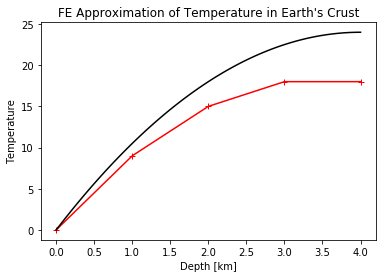

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the problem.

upperBC = 0        # Temperature at the surface of the crust.
lowerBC = 0        # Heat flux is 0 at 4km
Px = 3             # radiogenic heating (p(x) constant term)

# Make a mesh of all of the nodal positions. We can choose what sort of discretization we use here.
# The more nodes we have, the finer the mesh will be, so the closer our approximate solution is to the exact solution. 

z = np.linspace(0,4,5)   # First option: choose 5 evenly spaced nodes
#z = np.linspace(0,4.,500)  # Second option: choose 500 evenly spaced nodes and see how the solutions compare
    
    
# Now we need to define the elements. Remember from our above definition that these are essentially intervals
# representing the distance between two nodes.

h = np.diff(z)             # Vector representing the elements (distances between each node)
h_inv = 1/h               # Will be useful to define 1/h since, looking at our example A matrix, we use that value.


# Now we need to define the coefficient matrix A, or the stiffness matrix. We can follow the form in our math example.
# numpy notation: np.diag(v,k=0) where v is array-like object, and k is an integer set to main diagonal (0) default.

Alower = -np.diag(h_inv,-1)   #lower diagonal 
Aupper = -np.diag(h_inv,1)    #upper diagonal

diag1  = np.append(h_inv,[0]) #constructing the main diagonal
diag2  = np.append([0],h_inv) 
diag   = np.diag(diag1+diag2,0)
A      = diag + Alower + Aupper # add everything to create A

#We need to set the BCs for the A matrix. The first row represents the upper BCs, the final row the lower BCs.

A[0,0] = 1            # upper BC
A[0,1] = 0
A[-1,-1] = 1          # lower BC
A[-1,-2] = -1         

# Now we need to define the load vector / the right hand side of the equation.

f1 = np.append(Px*h/2,[0])    # with a constant Px, 'f' is only integrals over
f2 = np.append([0],Px*h/2)    # single basis functions (over 2 elements)
f = f1+f2

# Set the BCs again.
f[0]  = upperBC               
f[-1] = lowerBC                 

#Now solve.

T = np.linalg.solve(A,f)

#Plot
fig = plt.figure()
p1 = fig.add_subplot(1,1,1)
plt.plot(z,T, 'r-+')  #marks points with red plus mark, '-' connects with lines
p1.set_title("FE Approximation of Temperature in Earth's Crust")
p1.set_ylabel("Temperature")  
p1.set_xlabel("Depth [km]")  

# Compare with analytic solution
z = np.linspace(0,4.,100) 
p1.plot(z,(12*z - 3*z*z/2),'k-') #'k' creates black markers
plt.show()

### 2D Generalization

The above method can be easily generalized to other dimensions by selecting a different mesh and basis functions of some polynomial order. The 2D domain can be discretized easiest using triangles, quadrangles, etc. The process is otherwise identical.

### 2D Steady State Heat Equation Example


Governing Equation:
$$\frac{d^2T}{dx^2} + \frac{d^2T}{dy^2} + \frac{q}{k} = 0$$ <br>
#### Problem: Find the temperature in a square box with 5 nodes at (0,0) (0,2) (1,1) (2,0) (2,2). 
- A heat source of value q=1 is located at (1,1).
- Side x=0 is set at T=1
- Other 3 sides have heat flux $\frac{dT}{dn} = 1$. 
- Let the thermal conductivity $kx=ky=k=1$
(Note: there are only 3 unknown nodal Temperatures)

![](2DHeatConduction1.jpg)

#### Generalized solution -- Adapt for different triangular elements
Start by considering a single element such as element 1 (which happens to be congruent to all other elements).
We define a a simple polynomial interpolation function using the displacement of its nodes.
$$u = a+bx+cy$$
Element 1 has three local nodes or verticies. In this example, we will index starting at zero. A given element has three local nodes with coordinates($x_i,y_i$). This allows us to write the displacement corresponding to the element's 3 local nodes:

\begin{gather}
u=\begin{bmatrix}
u_0\\
u_1\\
u_2\\
\end{bmatrix}
= 
\begin{bmatrix}
1 & x_0 & y_0\\
1 & x_1 & y_1\\
1 & x_2 & y_2\\
\end{bmatrix}
\cdot \begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
\end{gather}

Next, we invert the matrix to find the coefficients. We can do this by a cyclic permuation of the 3 local nodes' xy-coordinates with $i \in \{0,1,2\}$ to define $\alpha, \beta, \text{and } \gamma$, where
$$\alpha_i = x_j y_k - x_k y_j $$
$$\beta_i = y_j-y_k$$
$$\gamma_i = x_k-x_j$$

Thus we get the coefficients $a,b,c$ for our displacement function $u_i=a_i+b_ix+c_iy$

\begin{gather}
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
= \frac{1}{2\cdot\text{Area of Element}}
\begin{bmatrix}
\alpha_0 & \beta_0 & \gamma_0\\
\alpha_1 & \beta_1 & \gamma_1\\
\alpha_2 & \beta_2 & \gamma_2\\
\end{bmatrix}
\cdot \begin{bmatrix}
u_0\\
u_1\\
u_2\\
\end{bmatrix}
= \begin{bmatrix}
\phi_0 & \phi_1 & \phi_2\\
\end{bmatrix}
\cdot \begin{bmatrix}
u_0\\
u_1\\
u_2\\
\end{bmatrix}
\end{gather}

We have found our basis function $\phi$ (aka shape function):
$$\phi_i = \frac{\alpha_i+\beta_i x+\gamma_i y}{2 \cdot \text{Area of Element}}$$ since $u = a+by+cy$ for an element:
$$u=\phi_0 u_0 + \phi_1 u_1 + \phi_2 u_2$$

Next we want to turn the PDE into the form $[K] \cdot T_n=g_n=F+Q$ where $K$ is our global stiffness matrix, $T_n$ are the temperatures at the global nodes, and $g_n$ is the sum of our boundary condition flux vector($F$) and our internal heat source ($Q$) vector that correspond to each global node

Earlier, we derived the 1D form from the PDE which also takes the form $[K] \cdot T_n=g_n$ 
\begin{gather}
\begin{bmatrix}
a(\phi_1,\phi_1) & a(\phi_1,\phi_2) & \cdots & a(\phi_1,\phi_{n-1}\\
a(\phi_2,\phi_1) & a(\phi_2,\phi_2) & \cdots & a(\phi_2,\phi_{n-1})\\
\vdots & \vdots & \vdots & \vdots \\
a(\phi_{n-1},\phi_1) & a(\phi_{n-1},\phi_2) & \cdots & a(\phi_{n-1},\phi_{n-1})\\
\end{bmatrix}
\begin{bmatrix}
t_1\\
t_2\\
\vdots\\
t_{n-1}\\
\end{bmatrix}
= \begin{bmatrix}
(f,\phi_1)\\
(f,\phi_2)\\
\vdots \\
(f,\phi_{n-1})\\
\end{bmatrix}
\end{gather}

##### Deriving the matricies now for 2D Heat Equation
Since our PDE is slightly different and we are indexing starting at 0. Remember, our PDE is:
$$\frac{d^2T}{dx^2} + \frac{d^2T}{dy^2} + \frac{q}{k} = 0 \iff k(\frac{d^2T}{dx^2} + \frac{d^2T}{dy^2}) + q=0$$

A more general form of the ODE with thermal conductivity $k_x$ in the $x$ direction and $k_y$ in the $y$ direction can be integrated using a weight function. This weight function in the Galerkin method is just $\phi_i$. In this method, we now integrate over the entire element (a region in space).
$${\int_{el} {dx dy} ( w_i (-\frac{d}{dx}(k_x \frac{dT}{dx}))+w_i (-\frac{d}{dy}(k_y \frac{dx}{dy}))+w_i q)= 0}$$
Since $\frac{d}{dx}[w_i k_x \frac{dT}{dx}] = \frac{dw_i}{dx} k_x \frac{dT}{dx} + w_i \frac{d}{dx}(k_x \frac{dT}{dx})$ (and the same replacing y and x), we can integrate this equation by parts to obtain:
$$ -w_i \frac{d}{dx}(k_x \frac{dT}{dx})= \frac{dw_i}{dx} k_x \frac{dT}{dx} - \frac{d}{dx}[w_i k_x \frac{dT}{dx}]$$
$$ -w_i \frac{d}{dy}(k_y \frac{dT}{dy})= \frac{dw_i}{dy} k_y \frac{dT}{dy} - \frac{d}{dy}[w_i k_y \frac{dT}{dy}]$$

The left hand side of the two equations we just found can substitute into our first integral, obtaining
$${\int_{el}{dxdy}( \frac{dw_i}{dx} k_x \frac{dT}{dx}+\frac{dw_i}{dy} k_y \frac{dT}{dy}+w_i q )}= \int_{el}{dxdy}( \frac{d}{dx}[w_i k_x \frac{dT}{dx}] + \frac{d}{dy}[w_i k_y \frac{dT}{dy}])$$

Using the divergence theorem, the right hand side becomes a line integral around $el$.
$$=\oint_{el} wi[k_x \frac{dT}{dx} n_x + k_y \frac{dT}{dy}n_y] ds$$

This integral is really the the heat flux $\frac{dT}{dx},\frac{dT}{dx}$ normal to the boundary of $el$. Note $n_x$ and $n_y$ are can be found by the cosine between the respective x or y axis and the boundary. These are what makes the flux normal to the boundary. Using our weighted residues where $T_j$ are the global node temperatures and $\phi_i$ is the shape/basis function:
$$T = \sum_{i=0}^n T_j \phi_j$$
$$\frac{dT}{dx}= \sum_{i=0}^{n-1} \frac{d\phi_j}{dx}T_j$$
$$\frac{dT}{dy}= \sum_{i=0}^{n-1} \frac{d\phi_j}{dx}T_j$$

We substitute in the partial derivatives and $w_i$ = $\phi_i$ and rearrange to to ultimately get:
$$\sum_{i=0}^{n-1} \int_{el} {dxdy}(\frac{d\phi_i}{dx} k_x \frac{d\phi_j}{dx}+\frac{d\phi_i}{dy} k_y \frac{d\phi_j}{dy})T_j =  \int_{el} -q \phi_i {dxdy}+\oint_{el} \phi_i[k_x \frac{dT}{dx} n_x + k_y \frac{dT}{dy}n_y] ds$$

This directly becomes the matrix for each element where the entries of the matrix are integrals. f is the "flux" boundary condition vector where f is the forcing term from the steady state PDE. In the f integral, it is -q since heat is flowing into the boundary. Q is the heating source (or sink) vector that represents the normal heat flux through the boundary of an element due to a source internal to the material.
$$[K_{ij}]^{el}\cdot T_j = f^{el} + Q^{el}$$
Note these temperatures are at the local nodes 0,1,2, so $[K_{ij}]^{el}$ is a 3x3 matrix. 

To make the matrix that equates the temperature of the global nodes to the flux through that global node, we need to combine all the element matricies together.
To now get to the global stiffness matrix $[K]$, we must consider the nodes on our diagram.

For element 0, the global nodes are $T_1, T_2,T_0$ (which are a part of $T_n$ which correspond to the local nodes $f_0, f_1, f_2$ respectively)--you can double check this in the diagram shown below. The other elements have their own 3x3 system of equations that are derived in the same way.


\begin{gather}
[K_{ij}]^0  \cdot
\begin{bmatrix}
T_1\\
T_2\\
T_0\\
\end{bmatrix}
= \begin{bmatrix}
f_0^0\\
f_1^0\\
f_2^0\\
\end{bmatrix}
+  \begin{bmatrix}
Q_0^0\\
Q_1^0\\
Q_2^0\\
\end{bmatrix}
\end{gather}


![](2DHeatConductionNode.jpg)

From these elements, we want to construct the whole material. We want to relate the temperature at each of the 5 total global nodes ($n \in \{0,1,2,3,4\}$) to boundary and heat source condition vectors at these global nodes. To get your global $g_n$ so that $[K]\cdot T_n = g_n$, we need to define each $g_n$ as a sum of all the elemental $f_i^{el}$ and $Q_i^{el}$ that correspond to the same global Tn node. To create the global stiffness matrix, we could combine the element matricies. A faster way is to integrate the basis functions as similarly done in the 1D case.

##### Combine elements into 1 system
Each entry in the 5x5 matrix $[K]$ is 
$$k_i^j=\int_{el} {dxdy}(\frac{d\phi_i}{dx} k_x \frac{d\phi_j}{dx}+\frac{d\phi_i}{dy} k_y \frac{d\phi_j}{dy})$$
Since we know what $\phi_i$, $\frac{d\phi}{dx}$, and $\frac{d\phi}{dy}$ is, we can substitute $\phi_i$ and its derivatives into $[K]$. We also can let $k_x=k_y=k$ for material with isotropic thermal conductivity.<br>
$$=(\int_{el} {dxdy})\cdot \frac{k}{4 \cdot \text{Area of the Element}^2} [\beta_i \beta_j+\gamma_i \gamma_j]$$
Evaluating the integral, we get another area of the element that cancels.
$$=\frac{k}{4 \cdot \text{Area of the Element}}[\beta_i \beta_j+\gamma_i \gamma_j]$$

In this problem, the Area of the Element (triangle) is simply found via the coordinates or $1/2 \cdot base \cdot height$
In our particular problem, $k_x=k_y=1$. 

Now to get $g_n$ we first do all the element's multiplication out of the 3x3 system. We then add the contributions from each local node to get the global node conditions. In our case, you will find:

$$g_n =\begin{gather}
    \begin{bmatrix}
        g_0\\
        g_1\\
        g_2\\
        g_3\\
        g_4\\
    \end{bmatrix}
    =
    \begin{bmatrix}
       (f_0^1+Q_0^1) +(f_2^0+Q_2^0)\\
       (f_0^0+Q_0^0) +(f_2^3+Q_2^3)\\
       (f_1^0+Q_1^0) +(f_1^1+Q_1^1)+(f_1^2+Q_1^2) +(f_1^3+Q_1^3)\\
       (f_2^1+Q_2^1) +(f_0^2+Q_0^2) \\
       (f_2^2+Q_2^2) +(f_0^3+Q_0^3)\\
    \end{bmatrix}
    \end{gather}$$

We need to use the conditions to determine the $f_i^{el}$ and $Q_i^{el}$. Before, we found:
 $$f_i^{el}+Q_i^{el} = \int_{el} -q \phi_i {dxdy}+\oint_{el} \phi_i[k_x \frac{dT}{dx} n_x + k_y \frac{dT}{dy}n_y] ds$$
 For the first integral, we can integrate the area of our triangular element using the two diagonal lines $y=x, y=2-x$.
 
 $$f_i^{el} = \int_{el} -q \phi_i {dxdy}=\int_{0}^1\int_{0}^x -q \cdot \frac{\alpha_i+\beta_i x+\gamma_i y}{2 \cdot \text{Area of Element}} {dydx}+\int_{0}^1\int_{0}^{2-x} -q \cdot \frac{\alpha_i+\beta_i x+\gamma_i y}{2 \cdot \text{Area of Element}} {dydx}=\frac{-q  (2\alpha_i + \beta_i + \frac{4 \gamma_i}{3})}{2\cdot \text{Area of Element}}$$
 Each element has 3 local nodes. Thus,
 $$f^{el} = \begin{bmatrix}
             \frac{-q  (2\alpha_0 + \beta_0 + \frac{4 \gamma_0}{3})}{2\cdot \text{Area of Element}} \\
             \frac{-q  (2\alpha_1 + \beta_1 + \frac{4 \gamma_1}{3})}{2\cdot \text{Area of Element}} \\
             2\frac{-q  (2\alpha_2 + \beta_2 + \frac{4 \gamma_2}{3})}{2\cdot \text{Area of Element}} \\
             \end{bmatrix}$$
             
Now we evaluate the $Q_i^{el} due to a point of heat source (likewise sink) internal to the material. We can parameterize the curve around the element to evaluate the integral:

$$Q_i^{el}=\oint_{el} \phi_i[k_x \frac{d\phi_j}{dx} n_x + k_y \frac{d\phi_j}{dy}n_y] ds$$

This is the useful formulation if the heat source is internal to an element and you need to distribute the affects to the local nodes.

Alternatively, if the the heat source is at a global node, we can put the value of the heat source at that global node. In our case, at global node 2, we have 

$$Q_1^0+Q_1^1+Q_1^2+Q_1^3 = \text{value of heat source} = 1$$ 

All other global nodes are at the boundary and have no heat source/sink value, so they are 0. Finally, we have all the pieces to solve the $[K]\cdot T_n = g_n$. We can solve for $T_n$. Since $T_0 =T_1= 1$ in this example, we only need to solve for the other $T_n$ values.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

k = 1 # thermal conducivity of our material
# generate mesh of nodes and elements
# we do this here by hand
# indexing starts at zero
G_node  = [[0,0], # global nodes
          [0,2],
          [1,1],
          [2,0],
          [2,2]]

el = [[0,2,1],     # el is the element nodal list for each element
      [0,3,2],
      [2,3,4],
      [1,2,4]]

l_node = [[0],[1],[2]] # each element has 3 local nodes


x = [1,2,3] # allows for permulation of local nodes of the triangle
y = [1,2,3]
Aj = np.zeros(len(el))
n=0
for j in el:            # j is the cord list for element j
    for i in range(3):  # triangle elements have 3 nodes
        x[i] = G_node[j[i]][0]  # the x,y coords for the corners
        y[i] = G_node[j[i]][1]
    # calculate the triangle element areas, using coordinates
    Aj[n] = 0.5*np.abs(x[0]*(y[1]-y[2])+x[1]*(y[2]-y[0])+x[2]*(y[0]-y[1]))
    n +=1


# now make A the stiffness matrix
nodes = len(G_node)
A = np.zeros([nodes,nodes])

for i in range(nodes):
    for j in range(nodes):
        # look for elements that have both i and j
        n=0
        for k in el:
            if (i == j) and (i in k):  # these are the integrals on the diagonal
                p = k.index(i)
                a = G_node[k[p-1]][1]-G_node[k[p-2]][1]
                b = G_node[k[p-2]][0]-G_node[k[p-1]][0]
                A[i,i] += (a*a + b*b)/(4*Aj[n])
            else:                      # the off diagonal terms
                if (i in k) and (j in k):
                    p = k.index(i)
                    q = k.index(j)
                    for m in k:        # need to find the node that is NOT i or j
                        if (k.index(m) != p) and (k.index(m) != q):
                            s = k.index(m)
                    a = G_node[k[p]][1]-G_node[k[s]][1]
                    b = G_node[k[s]][1]-G_node[k[q]][1]
                    c = G_node[k[p]][0]-G_node[k[s]][0]
                    d = G_node[k[s]][0]-G_node[k[q]][0]
                    A[i,j] += (a*b + c*d)/(4*Aj[n])
            n +=1
print('Global Stiffness Matrix=',A)

Global Stiffness Matrix= [[ 1.  0. -1.  0.  0.]
 [ 0.  1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0. -1.  0.  1.]]


In [ ]:
# Source on global node 2
Q = (0,0,1,0,0)

In [ ]:
### Constants that comprise our basis  function phi = 1/(2 element area) * alpha + beta*x + gamma*y
G_node  = np.array([[0,0], # global nodes
          [0,2],
          [1,1],
          [2,0],
          [2,2]])
# Permutation of all the coordinates (alternatively use loops and modulo)
alpha = [G_node[1,0]*G_node[2,1]-G_node[2,0]*G_node[1,1],G_node[2,0]*G_node[0,1]-G_node[0,0]*G_node[2,1],G_node[0,0]*G_node[1,1]-G_node[1,0]*G_node[0,1] ]
beta = [G_node[1,1]-G_node[2,1],G_node[2,1]-G_node[0,1],G_node[0,1]-G_node[1,1]]
gamma = [G_node[2,0]-G_node[1,0],G_node[0,0]-G_node[2,0],G_node[1,0]-G_node[0,0]]

In [12]:
# Constant flux on bounday
f = np.zeros(len(G_node))
q = 1 #flux
k = 1
m=0
f = np.zeros((len(el),len(l_node)))
while m < len(el):
    n=0
    while n < len(l_node):
        f[m,n] = -q*(2*alpha[n]+beta[n]+4/3*gamma[n])/(2*Aj[n])
        n+=1
    m+=1
F = np.zeros(nodes)
F[0] = f[1,0]+f[0,2]
F[1] = f[0,0]+f[3,2]
F[2] = f[0,1]+f[1,1]+f[2,1]+f[3,1]
F[3] = f[1,2]+f[2,0]
F[4] = f[2,2]+f[3,0]

In [13]:
# RHS term g =  boundary flux + heat generation
g = np.add(F,Q)

# Boundary conditions
#T0 = T1 = 1 global node boundary condition in temperature. Can whole system down to just find T2, T3,T4

# Solve for the temperature at the unknown global nodes
gn = np.stack((g[2],g[3],g[4]),axis = 0) #truncated RHS
AT = A[2:5, 2:5] #truncated stiffness matrix
T = np.linalg.solve(AT,gn)

T = np.concatenate((np.array([1,1]), T)) #Add back T0 and T1 we know
print('Global Temperature nodes are =',T)

Global Temperature nodes are = [1.         1.         2.66666667 4.5        4.5       ]


## Summary

FEM is a useful numerical method of approximating solutions to differential equations that are difficult to obtain analytical solutions for. The basis for being able to solve these equations stems from being able to use the weak integral form which allows us to turn the problem into essentially a linear algebra problem. From there, all we need to do is discretize and solve. We talked about a simple 1D example, and Bannhat and Robin both showed useful ways of discretizing problems in different situations through the use of meshes. There are several different Python packages and different softwares that use FEM such as Abaqus, but as we have shown here, it is possible to program FEM from scratch.